In [1]:
# Importeren van de nodige packages
# Vul zelf aan met extra packages als dit nodig is voor de oefeningen!
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

C:\Users\peter\AppData\Local\Temp\ipykernel_16024\1295246892.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Question 1

Suppose we have a dataset containing log data from a web server. Each row contains information from an HTTP request sent to the server, including the following information:

1. Timestamp of the HTTP request (in Unix time, number of seconds since 1970-01-01)
2. The type of HTTP request (GET, PUT, HEAD, DELETE, ...)
3. Response time (in ms)
4. The status of the response (2xx, 4xx, 5xx, ...)

What is the measurement level of each of these variables?

## Answers Question 1


1. interval  
2. nominaal
3. ratio
4. nominaal

## Question 2

For a survey in a school with 100 boys and 100 girls, the following method is used to form a sample:

- All boys and girls are sorted into two rows according to their height
- A coin is tossed
    - With cross, the first boy from the boys' row is chosen
    - At coin, the first girl is chosen from the girls' row.
- This is repeated until 10 pupils are selected.

<hr/>

1. Is this a random sample? Explain.
2. What type of error is being made here?
3. Is this a good sample? Explain.

## Answers Question 2

1. nee, want niet iedereen heeft een gelijke kans, de achterste in de rij hebben geen kans
2. Systematic sampling error
3. nee, veel te weinig + de kleinste of grootste worden enkel gekozen

## Question 3

In a basket are seven fruits, 4 oranges and 3 lemons. You take ...

(1) just one fruit. What is the probability that this is an orange?  
(2) one fruit and then another without putting the first one back. What is the probability that the two fruits taken are both oranges?  
(3) two fruits, one after one and without putting it back. What is the probability that the second fruit is an orange?  
(4) a first fruit, without looking! Then take another one from the basket without putting the first one back. This second fruit is an orange. Now what is the probability that the first fruit is an orange?

## Answers Question 3

1. 4 op 7
2. 2 op 7
3. 57,14%
4. 2 op 7

In [6]:
# P(orange) * P(orange) + P(geen orange) * p(orange)
(4/7) * (3/6) + (3/7) * (4/6)

# P(4/7) * (3/6)

0.5714285714285714

## Question 4

The diameter of pistons produced in a factory are _D_ cm where _D_ ~ Nor(13.4, 0.12)

(1) The tolerance specified for the pistons is that the diameter needs to be at least 13.35 cm and not more than 13.5 cm. What proportion of the production in the factory meets these tolerance limits?  
(2) Three pistons are chosen at random. What is the probability that none of them meet the tolerance limits  
(3) A sample of 20 pistons is taken at random. The mean value for the diameter is found to be 13.43 cm. Test at the 5% significance level whether any modifications have been made to the machine producing the pistons.


In [14]:
stats.norm.cdf(13.5, loc=13.4, scale=0.12) - stats.norm.cdf(13.35, loc=13.4, scale=0.12)
(1 - 0.4592104995256687) ** 3

0.15815566527086766

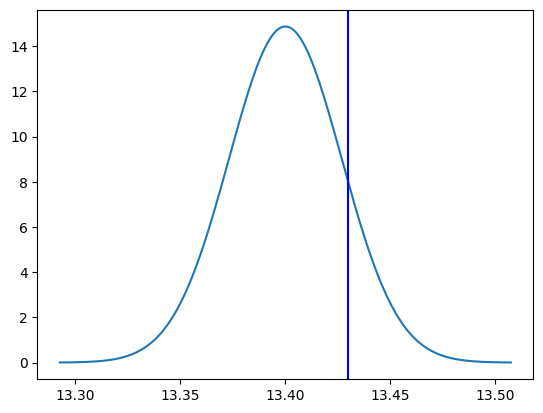

In [16]:
# Properties of the sample:
n = 20              # Sample size
mu = 13.4          # (Hypothetical) population mean
sigma = 0.12         # Population standard deviation (assumed to be known)
m_sample = 13.43    # Sample mean
s_sample = sigma / math.sqrt(n)

# X-values
dist_x = np.linspace(mu - 4 * s_sample, mu + 4 * s_sample, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, mu, s_sample)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)

# Fill the area left of x
# plt.fill_between(dist_x, 0, dist_y, where=(dist_x <= x), color='lightblue')
# Show the mean with an orange line
plt.axvline(m_sample, color="blue");

In [17]:
alpha = 0.05 # Significance level chosen by the researcher
p = stats.norm.sf(m_sample, loc=mu, scale=sigma/np.sqrt(n))

print("p-value: %.5f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")

p-value: 0.13178
p > alpha: do not reject H0


In [18]:
# Critical value according to the formula:
#    g = mu + stats.norm.isf(alpha) * sigma / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(alpha, loc=mu, scale=sigma / np.sqrt(n))
print("Critical value g ≃ %.3f" % g)
if (m_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (m_sample, g))

Critical value g ≃ 13.444
sample mean = 13.430 < g = 13.444: do not reject H0


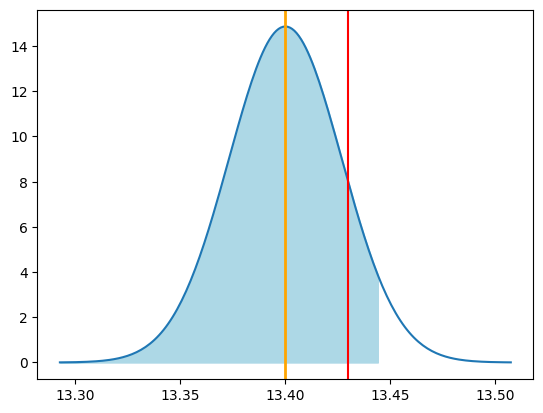

In [19]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, mu, sigma/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(mu, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(m_sample, color="red")
# Fill the acceptance area in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue');

## Answers Question 4

1. 45,92%
2. 15,81%
3. Er is geen aanleiding om H0 te verwerpen, p >> 0.05

## Question 5

The number of employees on the payroll at a food processing company is recorded at the beginning of each month.
These data are given below.

1. Give the data types of both columns
2. Convert the 'date' column to datetime type. Even if this fails you can continue working.
3. Create the following plot.

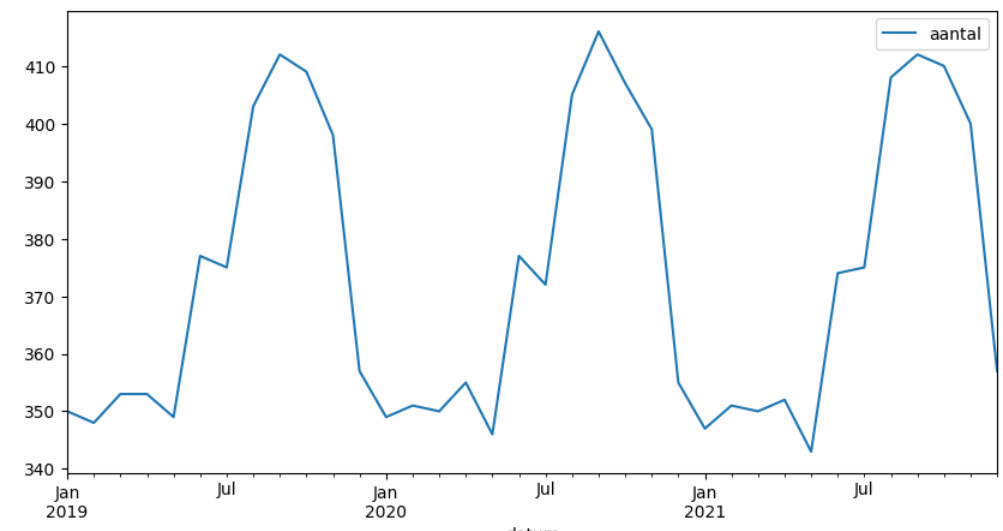

4. Make a forecast for the first four months of the next year using the most appropriate method. Explain why you chose this method.
5. Make a plot including the forecast.
6. Make the following calculations
- 6.1 Calculate the average number of employees in 2020
- 6.2 How many months did the company have more than 400 employees?




In [46]:
dfemployees = pd.DataFrame(data={
    'recording_date': ['2019/01/01', '2019/02/01', '2019/03/01', '2019/04/01', '2019/05/01', '2019/06/01', '2019/07/01', '2019/08/01', '2019/09/01', '2019/10/01', '2019/11/01', '2019/12/01', '2020/01/01', '2020/02/01', '2020/03/01', '2020/04/01', '2020/05/01', '2020/06/01', '2020/07/01', '2020/08/01', '2020/09/01', '2020/10/01', '2020/11/01', '2020/12/01', '2021/01/01', '2021/02/01', '2021/03/01', '2021/04/01', '2021/05/01', '2021/06/01', '2021/07/01', '2021/08/01', '2021/09/01', '2021/10/01', '2021/11/01', '2021/12/01'],
    'number': [350,348,353,353,349,377,375,403,412,409,398,357,349,351,350,355,346,377,372,405,416,407,399,355,347,351,350,352,343,374,375,408,412,410,400,357]
})
dfemployees.head(10)

,recording_date,number
0,2019/01/01,350
1,2019/02/01,348
2,2019/03/01,353
3,2019/04/01,353
4,2019/05/01,349
5,2019/06/01,377
6,2019/07/01,375
7,2019/08/01,403
8,2019/09/01,412
9,2019/10/01,409


In [43]:
print(dfemployees.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   recording_date  36 non-null     object
 1   number          36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 704.0+ bytes
None


In [47]:
dfemployees["recording_date"] = pd.to_datetime(dfemployees['recording_date'])
dfemployees = dfemployees.set_index('recording_date')
dfemployees.head()

,number
recording_date,
2019-01-01,350
2019-02-01,348
2019-03-01,353
2019-04-01,353
2019-05-01,349


<Axes: xlabel='recording_date'>

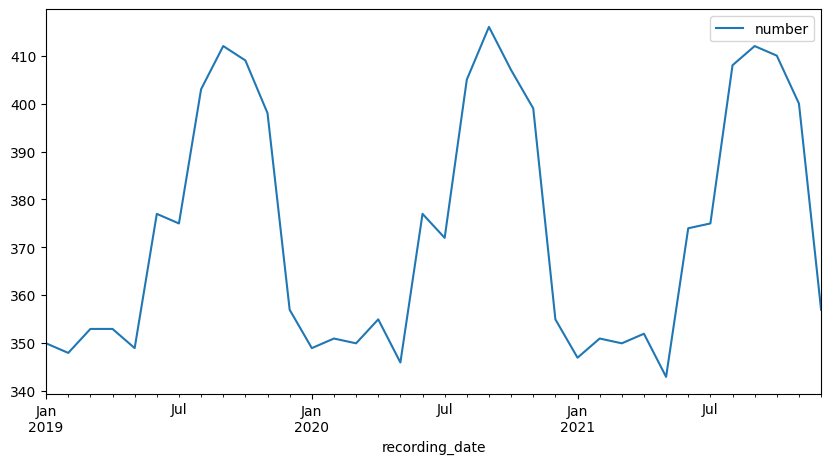

In [49]:
dfemployees.plot( y='number', figsize=[10,5])

<Axes: xlabel='recording_date'>

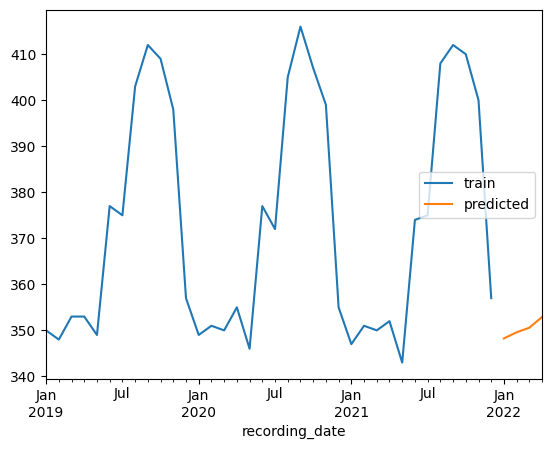

In [51]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = dfemployees.number

emp_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12, freq='MS').fit()

emp_predicted = emp_hw.forecast(4)

train.plot(legend=True, label='train')

emp_predicted.plot(legend=True, label='predicted')

In [53]:
dfemployees[dfemployees.number > 400].count()

number    9
dtype: int64

In [54]:
dfemployees['2020/01/01':'2020/12/01'].mean()

number    373.5
dtype: float64

## Question 6

The sample given below contains measurement results of a variable Temperature at two time points (`time1` and `time2`). We want to know whether the measurements at the second time point are significantly different from those at the first time point.

Use an appropriate statistical test (with significance level 5%) to verify this statement.

1. Visualise the data with an appropriate plot. What can you infer about the research question? Explain.
2. What statistical test should you use to answer this research question? Be as specific as possible!
3. Formulate the null hypothesis and the alternative hypothesis.
4. Calculate the p-value.
5. Draw a conclusion based on the previous step and formulate an answer to the research question.
6. Give for the observations at time `time1`:
    1. The interquartile range
    2. The kurtosis
    3. The range
    4. The standard deviation

In [57]:
temperatures = pd.DataFrame(data={
  'time1': [65, 87, 59, 71, 58, 74, 55, 98, 62, 53, 84, 63, 78, 62, 60],
  'time2': [82, 91, 86, 83, 85, 51, 65, 61, 76, 65, 53, 70, 51, 55, 68]
})
temperatures.head()

,time1,time2
0,65,82
1,87,91
2,59,86
3,71,83
4,58,85


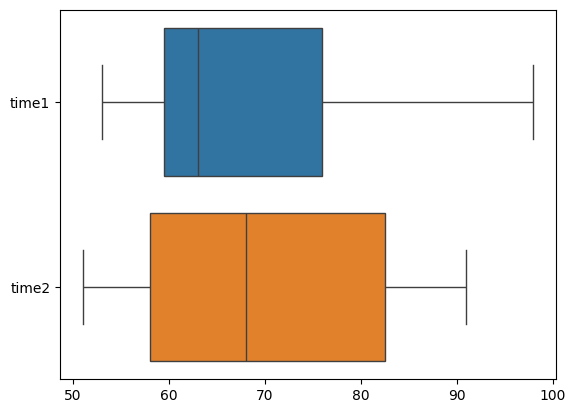

In [61]:
sns.boxplot(data=temperatures, orient='h');

The hypotheses are:

- $H_0$: $\mu_1 - \mu_2 = 0$ (time is the same in both groups)
- $H_1$: $\mu_1 - \mu_2 < 0$ (time2 is significantly higher than time1)

In [62]:
stats.ttest_rel(temperatures['time1'], temperatures['time2'], alternative='less')

TtestResult(statistic=-0.16099236542769346, pvalue=0.43719974299972214, df=14)

In [ ]:
# H0 mag niet verworpen worden, de p value >> 0.5

In [66]:
print(temperatures['time1'].quantile(0.75) - temperatures['time2'].quantile(0.25))
print(f"kurtosis: {temperatures['time1'].kurtosis()}")
print(f"range: {temperatures['time1'].max() - temperatures['time1'].min()}")
print(f"Standard deviation: {temperatures['time1'].std()}")

18.0
kurtosis: 0.15796776764037945
range: 45
Standard deviation: 13.09743704481366


## Answers Question 6


1.
2.
3.
4.
5.
6.
   1.
   2.
   3.
   4.

## Question 7

The figure below shows a graph of a time series.  The observations are plotted in black with a solid line. In addition, three forms of moving average are plotted.

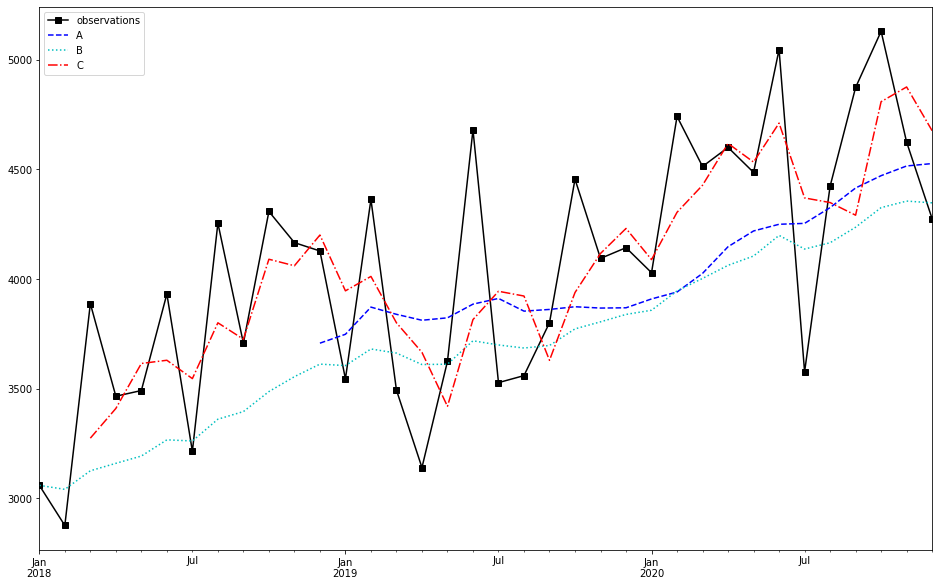

For each (A, B, C), indicate exactly what form of moving average is involved. Choose from the options given below:

- Simple moving average with period 3
- Simple moving average with period 12
- Simple exponential smoothing with $alpha = 0.1$
- Simple exponential smoothing with $alpha = 0.9$

If you had to set up a model for this time series based on exponential smoothing, which one would you use? Explain shortly your answer.

## Answers question 7

1. A (purple, Simple moving average with period 12):
2. B (cyan, Simple exponential smoothing with  alpha=0.1):
3. C (red, Simple moving average with period 3):
4. The most appropriate form of exponential smoothing is double because there is trend but no season(not really)


## Question 8

Given last year's mileage and maintenance costs of 23 trucks.

(1) Make the plot below (In the Answers, give the command for this plot)

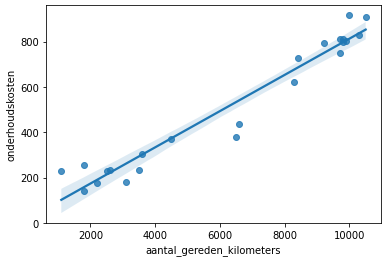

(2) Give the equation of the line   
(3) Calculate the correlation coefficient (symbol + value)  
(4) Formulate an interpretation for the value of the correlation coefficient  
(5) Approximately how much will be the maintenance cost of a truck driving 5000 kilometres.  
(6) What will be the approximate fixed cost of a truck even if it has not driven a single kilometre?  



In [67]:
sample_data = pd.DataFrame(data = {
    'mileage': [10500, 9700, 9200, 8300, 6500, 4500, 3500, 2200, 1800, 9800, 6600, 3600, 2500, 3100, 8400, 9700, 1800, 10000, 9800, 9900, 1100, 2600, 10300],
    'maintenance costs': [908.56, 751.12, 793.55, 619.61, 380.11, 368.72, 235.32, 174.93, 256.30, 799.58, 436.04, 304.25, 226.81, 179.68, 726.65, 810.53, 142.53, 915.53, 812.45, 803.78, 227.32, 231.46, 829.21]})

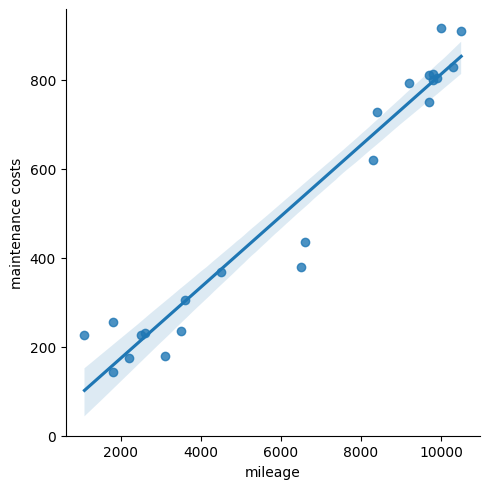

In [68]:
sns.lmplot(data=sample_data, x='mileage', y='maintenance costs');

In [69]:
# y = ax + b
x = sample_data.mileage
y = sample_data['maintenance costs']
a, b = np.polyfit(x, y, 1)

print(f"Regression line: y = {a} * x + {b}")

Regression line: y = 0.07989843131805248 * x + 13.774264624137674


In [70]:
# Python function numpy.corrcoef() - returns a matrix, like numpy.cov()
cor = np.corrcoef(
    sample_data.mileage,
    sample_data['maintenance costs'])[0][1]
print(f"R ≈ {cor:.4f}")

R ≈ 0.9735


In [ ]:
# positief dus stijgend
# dicht bij 1 dus sterk verband

In [71]:
a * 5000 + b

413.26642121440005

In [72]:
b

13.774264624137674

## Answers Question 8


1.
2.
3.
4.
5.


## Question 9

You recently offered samples of three products to every customer who entered your business. You then asked which product customers liked best. You recorded these preferences for Product A, Product B and Product C in the dataset given below.

Do customers have a distinct preference for any of these products? Use an appropriate statistical test (with significance level 5%) to verify this statement.

1. Visualise the data with an appropriate plot. What can you infer about the research question? Explain.
2. What hypothesis test will you apply to answer this research question? Be as specific as possible!
3. Formulate the null hypothesis and the alternative hypothesis
4. Calculate the appropriate test statistic (test statistic) for this test. Give the symbol and value
5. Calculate the p-value
6. Draw a conclusion based on the previous step and formulate an answer to the research question.

In [73]:
products = pd.DataFrame(data={'Choice': [
  "Product A","Product A","Product B","Product B","Product C",
  "Product B","Product B","Product B","Product C","Product B",
  "Product C","Product A","Product C","Product B","Product C",
  "Product B","Product C","Product C","Product C","Product B",
  "Product C","Product C","Product B","Product C","Product B",
  "Product B","Product B","Product B","Product A","Product B",
  "Product B","Product B","Product B","Product B","Product C",
  "Product C","Product B","Product C","Product C","Product A",
  "Product C","Product C","Product B","Product B","Product B",
  "Product B","Product C","Product C","Product C","Product C",
  "Product C","Product B","Product A","Product C","Product C",
  "Product B","Product B","Product C","Product C","Product C",
  "Product B","Product C","Product B","Product B","Product C",
  "Product B","Product B","Product C","Product C","Product B",
  "Product C","Product C","Product C","Product B","Product B",
  "Product C","Product C","Product C","Product C","Product C",
  "Product C","Product C","Product C","Product C","Product C",
  "Product C","Product C","Product C","Product C","Product B"
]})
products.head(10)

,Choice
0,Product A
1,Product A
2,Product B
3,Product B
4,Product C
5,Product B
6,Product B
7,Product B
8,Product C
9,Product B


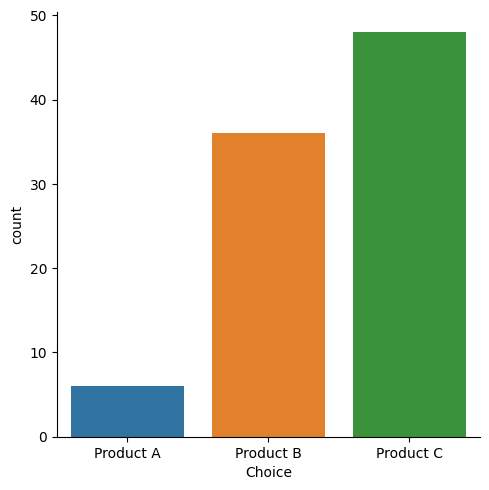

In [74]:
sns.catplot(data=products, x='Choice', hue='Choice', kind='count');

In [75]:
# Goodness of fit test

1. Formulate the hypotheses:
   - $H_0$: De drie producten zijn bij de gebruikers even populair
   - $H_1$: De drie producten zijn niet even populair bij de gebruikers


In [76]:
observed = products.value_counts()
expected_p = np.array([   1/3,     1/3,     1/3])

In [77]:
alpha = 0.05               # Significance level
n = sum(observed)          # Sample size
k = len(observed)          # Number of categories
dof = k - 1                # Degrees of freedom
expected = expected_p * n  # Expected absolute frequencies in the sample
g = stats.chi2.isf(alpha, df=dof)  # Critical value

# Goodness-of-fit-test in Python:
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("Significance level  ⍺ = %.2f" % alpha)
print("Sample size         n = %d" % n)
print("k = %d; df = %d" % (k, dof))
print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.4f" % p)

Significance level  ⍺ = 0.05
Sample size         n = 90
k = 3; df = 2
Chi-squared        χ² = 31.2000
Critical value      g = 5.9915
p-value             p = 0.0000


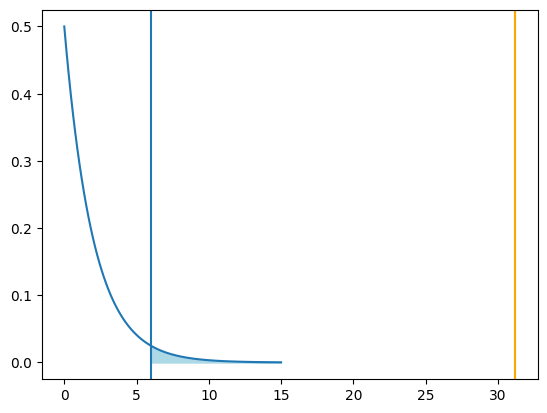

In [78]:
# Plot of the case:
# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=dof)

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange'); # chi-squared

In [ ]:
# P << 0.05 dus er is aanleiding om h0 te verwerpen
# De drie producten zijn niet even populair bij de gebruikers

## Answers Question 9


1.
2.
3.
4.
5.
6.